In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr


pd.set_option('display.max_columns', None)


In [17]:
# Read the CSV into a DataFrame
team_stats = pd.read_csv('./Basketball_Data/2010_2023_Team_Data.csv')

# Drop the duplicated Wins column
team_stats.drop('W.1', axis=1, inplace=True)

team_stats.head()


,Rk,Season,Team,W,G,L,W/L%,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG.1,FGA.1,2P.1,2PA.1,3P.1,3PA.1,FT.1,FTA.1,ORB.1,DRB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1,PTS.1
0,1,2015-16,GSW,73,82,9,0.890,242.4,42.5,87.3,29.4,55.7,13.1,31.6,16.7,21.8,10.0,36.2,46.2,28.9,8.4,6.1,15.2,20.7,114.9,38.9,89.4,31.1,65.9,7.8,23.5,18.6,24.5,11.4,32.5,43.9,22.2,8.7,4.1,14.5,19.8,104.1
1,2,2016-17,GSW,67,82,15,0.817,241.2,43.1,87.1,31.1,55.8,12.0,31.2,17.8,22.6,9.4,35.0,44.4,30.4,9.6,6.8,14.8,19.3,115.9,38.8,89.2,29.8,61.4,9.0,27.8,17.7,23.2,11.7,31.8,43.5,22.7,8.6,3.8,15.5,19.4,104.3
2,3,2015-16,SAS,67,82,15,0.817,240.3,40.1,82.9,33.2,64.4,7.0,18.5,16.4,20.4,9.4,34.5,43.9,24.5,8.3,5.9,13.1,17.5,103.5,35.7,81.8,29.1,61.9,6.6,19.9,14.9,19.6,9.1,31.4,40.5,20.8,7.2,3.9,14.8,19.5,92.9
3,4,2014-15,GSW,67,82,15,0.817,240.6,41.6,87.0,30.8,60.0,10.8,27.0,16.0,20.8,10.4,34.3,44.7,27.4,9.3,6.0,14.5,19.9,110.0,37.0,86.4,29.7,65.0,7.2,21.4,18.7,24.5,11.7,32.8,44.5,21.0,8.3,3.6,16.2,18.8,99.9
4,5,2012-13,MIA,66,82,16,0.805,242.4,38.4,77.4,29.6,55.4,8.7,22.1,17.4,23.0,8.2,30.4,38.6,23.0,8.7,5.4,13.9,18.7,102.9,35.6,80.9,28.0,59.1,7.6,21.7,16.2,21.2,11.2,28.9,40.1,20.2,7.9,3.2,15.6,20.4,95.0


In [18]:
# Read the CSV into a DataFrame
advanced_stats = pd.read_csv('./Basketball_Data/2010_2023_advanced_stats.csv')

# Drop the duplicated Wins column
advanced_stats.drop('W.1', axis=1, inplace=True)

advanced_stats

,Rk,Season,Team,W,G,L,W/L%,MOV,SOS,SRS,Pace,ORtg,DRtg,eFG%,TS%,TOV%,ORB%,FTr,eFG%.1,TS%.1,TOV%.1,ORB%.1,FTr.1
0,1,2015-16,GSW,73,82,9,0.890,10.76,-0.38,10.38,99.3,114.5,103.8,0.563,0.593,13.5,23.5,0.250,0.479,0.520,12.6,24.0,0.275
1,2,2016-17,GSW,67,82,15,0.817,11.63,-0.28,11.35,99.8,115.6,104.0,0.563,0.597,13.2,22.8,0.259,0.486,0.525,13.5,25.1,0.261
2,3,2015-16,SAS,67,82,15,0.817,10.63,-0.36,10.28,93.8,110.3,99.0,0.526,0.564,12.4,23.0,0.246,0.477,0.513,14.1,20.9,0.240
3,4,2014-15,GSW,67,82,15,0.817,10.10,-0.09,10.01,98.3,111.6,101.4,0.540,0.571,13.1,24.1,0.239,0.470,0.514,14.3,25.5,0.284
4,5,2012-13,MIA,66,82,16,0.805,7.87,-0.84,7.03,90.7,112.3,103.7,0.552,0.588,13.7,22.2,0.297,0.487,0.527,14.8,27.0,0.262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,2014-15,MIN,16,82,66,0.195,-8.79,0.79,-8.00,94.4,102.9,112.2,0.468,0.517,13.7,26.6,0.309,0.537,0.569,13.9,28.4,0.246
386,387,2019-20,GSW,15,65,50,0.231,-8.71,0.59,-8.12,100.3,105.2,113.8,0.497,0.540,13.2,21.5,0.264,0.553,0.586,13.7,23.6,0.247
387,388,2013-14,MIL,15,82,67,0.183,-8.18,-0.23,-8.41,91.8,103.0,111.8,0.479,0.519,14.1,27.1,0.274,0.520,0.559,13.2,28.6,0.299
388,389,2015-16,PHI,10,82,72,0.122,-10.23,0.31,-9.92,97.9,98.8,109.2,0.487,0.519,14.8,20.6,0.269,0.510,0.555,13.5,26.0,0.306


In [19]:
full_stats = pd.merge(team_stats, advanced_stats, on=['Team', 'Season', 'Rk', 'W', 'G', 'W/L%', 'L' ])
full_stats

,Rk,Season,Team,W,G,L,W/L%,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG.1,FGA.1,2P.1,2PA.1,3P.1,3PA.1,FT.1,FTA.1,ORB.1,DRB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1,PTS.1,MOV,SOS,SRS,Pace,ORtg,DRtg,eFG%,TS%,TOV%,ORB%,FTr,eFG%.1,TS%.1,TOV%.1,ORB%.1,FTr.1
0,1,2015-16,GSW,73,82,9,0.890,242.4,42.5,87.3,29.4,55.7,13.1,31.6,16.7,21.8,10.0,36.2,46.2,28.9,8.4,6.1,15.2,20.7,114.9,38.9,89.4,31.1,65.9,7.8,23.5,18.6,24.5,11.4,32.5,43.9,22.2,8.7,4.1,14.5,19.8,104.1,10.76,-0.38,10.38,99.3,114.5,103.8,0.563,0.593,13.5,23.5,0.250,0.479,0.520,12.6,24.0,0.275
1,2,2016-17,GSW,67,82,15,0.817,241.2,43.1,87.1,31.1,55.8,12.0,31.2,17.8,22.6,9.4,35.0,44.4,30.4,9.6,6.8,14.8,19.3,115.9,38.8,89.2,29.8,61.4,9.0,27.8,17.7,23.2,11.7,31.8,43.5,22.7,8.6,3.8,15.5,19.4,104.3,11.63,-0.28,11.35,99.8,115.6,104.0,0.563,0.597,13.2,22.8,0.259,0.486,0.525,13.5,25.1,0.261
2,3,2015-16,SAS,67,82,15,0.817,240.3,40.1,82.9,33.2,64.4,7.0,18.5,16.4,20.4,9.4,34.5,43.9,24.5,8.3,5.9,13.1,17.5,103.5,35.7,81.8,29.1,61.9,6.6,19.9,14.9,19.6,9.1,31.4,40.5,20.8,7.2,3.9,14.8,19.5,92.9,10.63,-0.36,10.28,93.8,110.3,99.0,0.526,0.564,12.4,23.0,0.246,0.477,0.513,14.1,20.9,0.240
3,4,2014-15,GSW,67,82,15,0.817,240.6,41.6,87.0,30.8,60.0,10.8,27.0,16.0,20.8,10.4,34.3,44.7,27.4,9.3,6.0,14.5,19.9,110.0,37.0,86.4,29.7,65.0,7.2,21.4,18.7,24.5,11.7,32.8,44.5,21.0,8.3,3.6,16.2,18.8,99.9,10.10,-0.09,10.01,98.3,111.6,101.4,0.540,0.571,13.1,24.1,0.239,0.470,0.514,14.3,25.5,0.284
4,5,2012-13,MIA,66,82,16,0.805,242.4,38.4,77.4,29.6,55.4,8.7,22.1,17.4,23.0,8.2,30.4,38.6,23.0,8.7,5.4,13.9,18.7,102.9,35.6,80.9,28.0,59.1,7.6,21.7,16.2,21.2,11.2,28.9,40.1,20.2,7.9,3.2,15.6,20.4,95.0,7.87,-0.84,7.03,90.7,112.3,103.7,0.552,0.588,13.7,22.2,0.297,0.487,0.527,14.8,27.0,0.262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,386,2014-15,MIN,16,82,66,0.195,241.5,36.4,83.2,31.5,68.3,5.0,14.9,20.0,25.7,11.6,29.3,40.9,21.6,8.1,4.0,15.0,19.2,97.8,41.1,84.5,32.6,61.4,8.5,23.1,15.8,20.8,11.6,31.9,43.6,23.6,8.4,5.5,15.2,21.4,106.5,-8.79,0.79,-8.00,94.4,102.9,112.2,0.468,0.517,13.7,26.6,0.309,0.537,0.569,13.9,28.4,0.246
378,387,2019-20,GSW,15,65,50,0.231,241.9,38.6,88.2,28.2,56.9,10.4,31.3,18.7,23.2,10.0,32.9,42.8,25.6,8.2,4.6,14.9,20.1,106.3,42.2,88.6,28.7,53.8,13.5,34.8,17.1,21.9,10.2,36.3,46.5,26.1,8.2,4.9,15.6,20.1,115.0,-8.71,0.59,-8.12,100.3,105.2,113.8,0.497,0.540,13.2,21.5,0.264,0.553,0.586,13.7,23.6,0.247
379,388,2013-14,MIL,15,82,67,0.183,242.4,36.0,82.2,29.3,63.2,6.7,18.9,16.8,22.5,11.8,29.3,41.1,21.5,6.6,4.9,15.1,20.9,95.5,38.4,82.0,29.9,59.7,8.5,22.3,18.4,24.5,11.7,31.8,43.5,22.8,7.8,5.0,14.1,20.6,103.7,-8.18,-0.23,-8.41,91.8,103.0,111.8,0.479,0.519,14.1,27.1,0.274,0.520,0.559,13.2,28.6,0.299
380,389,2015-16,PHI,10,82,72,0.122,241.5,36.2,84.0,26.9,56.5,9.3,27.5,15.7,22.6,9.5,31.8,41.2,21.5,8.3,6.0,16.4,21.7,97.4,39.7,85.4,31.9,63.8,7.8,21.7,20.5,26.1,11.1,36.4,47.6,23.4,8.7,5.7,15.1,19.2,107.6,-10.23,0.31,-9.92,97.9,98.8,109.2,0.487,0.519,14.8,20.6,0.269,0.510,0.555,13.5,26.0,0.306


In [20]:
# Loop through the column names and replace the .1's with _opponent
new_column_names = {}
for col in full_stats.columns:
    if col.endswith('.1'):
        new_column_names[col] = col.replace('.1', '_opponent')

# Rename the columns
full_stats.rename(columns=new_column_names, inplace=True)

# Show the DataFrame after renaming columns
print("After renaming columns:")
full_stats

After renaming columns:


,Rk,Season,Team,W,G,L,W/L%,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG_opponent,FGA_opponent,2P_opponent,2PA_opponent,3P_opponent,3PA_opponent,FT_opponent,FTA_opponent,ORB_opponent,DRB_opponent,TRB_opponent,AST_opponent,STL_opponent,BLK_opponent,TOV_opponent,PF_opponent,PTS_opponent,MOV,SOS,SRS,Pace,ORtg,DRtg,eFG%,TS%,TOV%,ORB%,FTr,eFG%_opponent,TS%_opponent,TOV%_opponent,ORB%_opponent,FTr_opponent
0,1,2015-16,GSW,73,82,9,0.890,242.4,42.5,87.3,29.4,55.7,13.1,31.6,16.7,21.8,10.0,36.2,46.2,28.9,8.4,6.1,15.2,20.7,114.9,38.9,89.4,31.1,65.9,7.8,23.5,18.6,24.5,11.4,32.5,43.9,22.2,8.7,4.1,14.5,19.8,104.1,10.76,-0.38,10.38,99.3,114.5,103.8,0.563,0.593,13.5,23.5,0.250,0.479,0.520,12.6,24.0,0.275
1,2,2016-17,GSW,67,82,15,0.817,241.2,43.1,87.1,31.1,55.8,12.0,31.2,17.8,22.6,9.4,35.0,44.4,30.4,9.6,6.8,14.8,19.3,115.9,38.8,89.2,29.8,61.4,9.0,27.8,17.7,23.2,11.7,31.8,43.5,22.7,8.6,3.8,15.5,19.4,104.3,11.63,-0.28,11.35,99.8,115.6,104.0,0.563,0.597,13.2,22.8,0.259,0.486,0.525,13.5,25.1,0.261
2,3,2015-16,SAS,67,82,15,0.817,240.3,40.1,82.9,33.2,64.4,7.0,18.5,16.4,20.4,9.4,34.5,43.9,24.5,8.3,5.9,13.1,17.5,103.5,35.7,81.8,29.1,61.9,6.6,19.9,14.9,19.6,9.1,31.4,40.5,20.8,7.2,3.9,14.8,19.5,92.9,10.63,-0.36,10.28,93.8,110.3,99.0,0.526,0.564,12.4,23.0,0.246,0.477,0.513,14.1,20.9,0.240
3,4,2014-15,GSW,67,82,15,0.817,240.6,41.6,87.0,30.8,60.0,10.8,27.0,16.0,20.8,10.4,34.3,44.7,27.4,9.3,6.0,14.5,19.9,110.0,37.0,86.4,29.7,65.0,7.2,21.4,18.7,24.5,11.7,32.8,44.5,21.0,8.3,3.6,16.2,18.8,99.9,10.10,-0.09,10.01,98.3,111.6,101.4,0.540,0.571,13.1,24.1,0.239,0.470,0.514,14.3,25.5,0.284
4,5,2012-13,MIA,66,82,16,0.805,242.4,38.4,77.4,29.6,55.4,8.7,22.1,17.4,23.0,8.2,30.4,38.6,23.0,8.7,5.4,13.9,18.7,102.9,35.6,80.9,28.0,59.1,7.6,21.7,16.2,21.2,11.2,28.9,40.1,20.2,7.9,3.2,15.6,20.4,95.0,7.87,-0.84,7.03,90.7,112.3,103.7,0.552,0.588,13.7,22.2,0.297,0.487,0.527,14.8,27.0,0.262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,386,2014-15,MIN,16,82,66,0.195,241.5,36.4,83.2,31.5,68.3,5.0,14.9,20.0,25.7,11.6,29.3,40.9,21.6,8.1,4.0,15.0,19.2,97.8,41.1,84.5,32.6,61.4,8.5,23.1,15.8,20.8,11.6,31.9,43.6,23.6,8.4,5.5,15.2,21.4,106.5,-8.79,0.79,-8.00,94.4,102.9,112.2,0.468,0.517,13.7,26.6,0.309,0.537,0.569,13.9,28.4,0.246
378,387,2019-20,GSW,15,65,50,0.231,241.9,38.6,88.2,28.2,56.9,10.4,31.3,18.7,23.2,10.0,32.9,42.8,25.6,8.2,4.6,14.9,20.1,106.3,42.2,88.6,28.7,53.8,13.5,34.8,17.1,21.9,10.2,36.3,46.5,26.1,8.2,4.9,15.6,20.1,115.0,-8.71,0.59,-8.12,100.3,105.2,113.8,0.497,0.540,13.2,21.5,0.264,0.553,0.586,13.7,23.6,0.247
379,388,2013-14,MIL,15,82,67,0.183,242.4,36.0,82.2,29.3,63.2,6.7,18.9,16.8,22.5,11.8,29.3,41.1,21.5,6.6,4.9,15.1,20.9,95.5,38.4,82.0,29.9,59.7,8.5,22.3,18.4,24.5,11.7,31.8,43.5,22.8,7.8,5.0,14.1,20.6,103.7,-8.18,-0.23,-8.41,91.8,103.0,111.8,0.479,0.519,14.1,27.1,0.274,0.520,0.559,13.2,28.6,0.299
380,389,2015-16,PHI,10,82,72,0.122,241.5,36.2,84.0,26.9,56.5,9.3,27.5,15.7,22.6,9.5,31.8,41.2,21.5,8.3,6.0,16.4,21.7,97.4,39.7,85.4,31.9,63.8,7.8,21.7,20.5,26.1,11.1,36.4,47.6,23.4,8.7,5.7,15.1,19.2,107.6,-10.23,0.31,-9.92,97.9,98.8,109.2,0.487,0.519,14.8,20.6,0.269,0.510,0.555,13.5,26.0,0.306


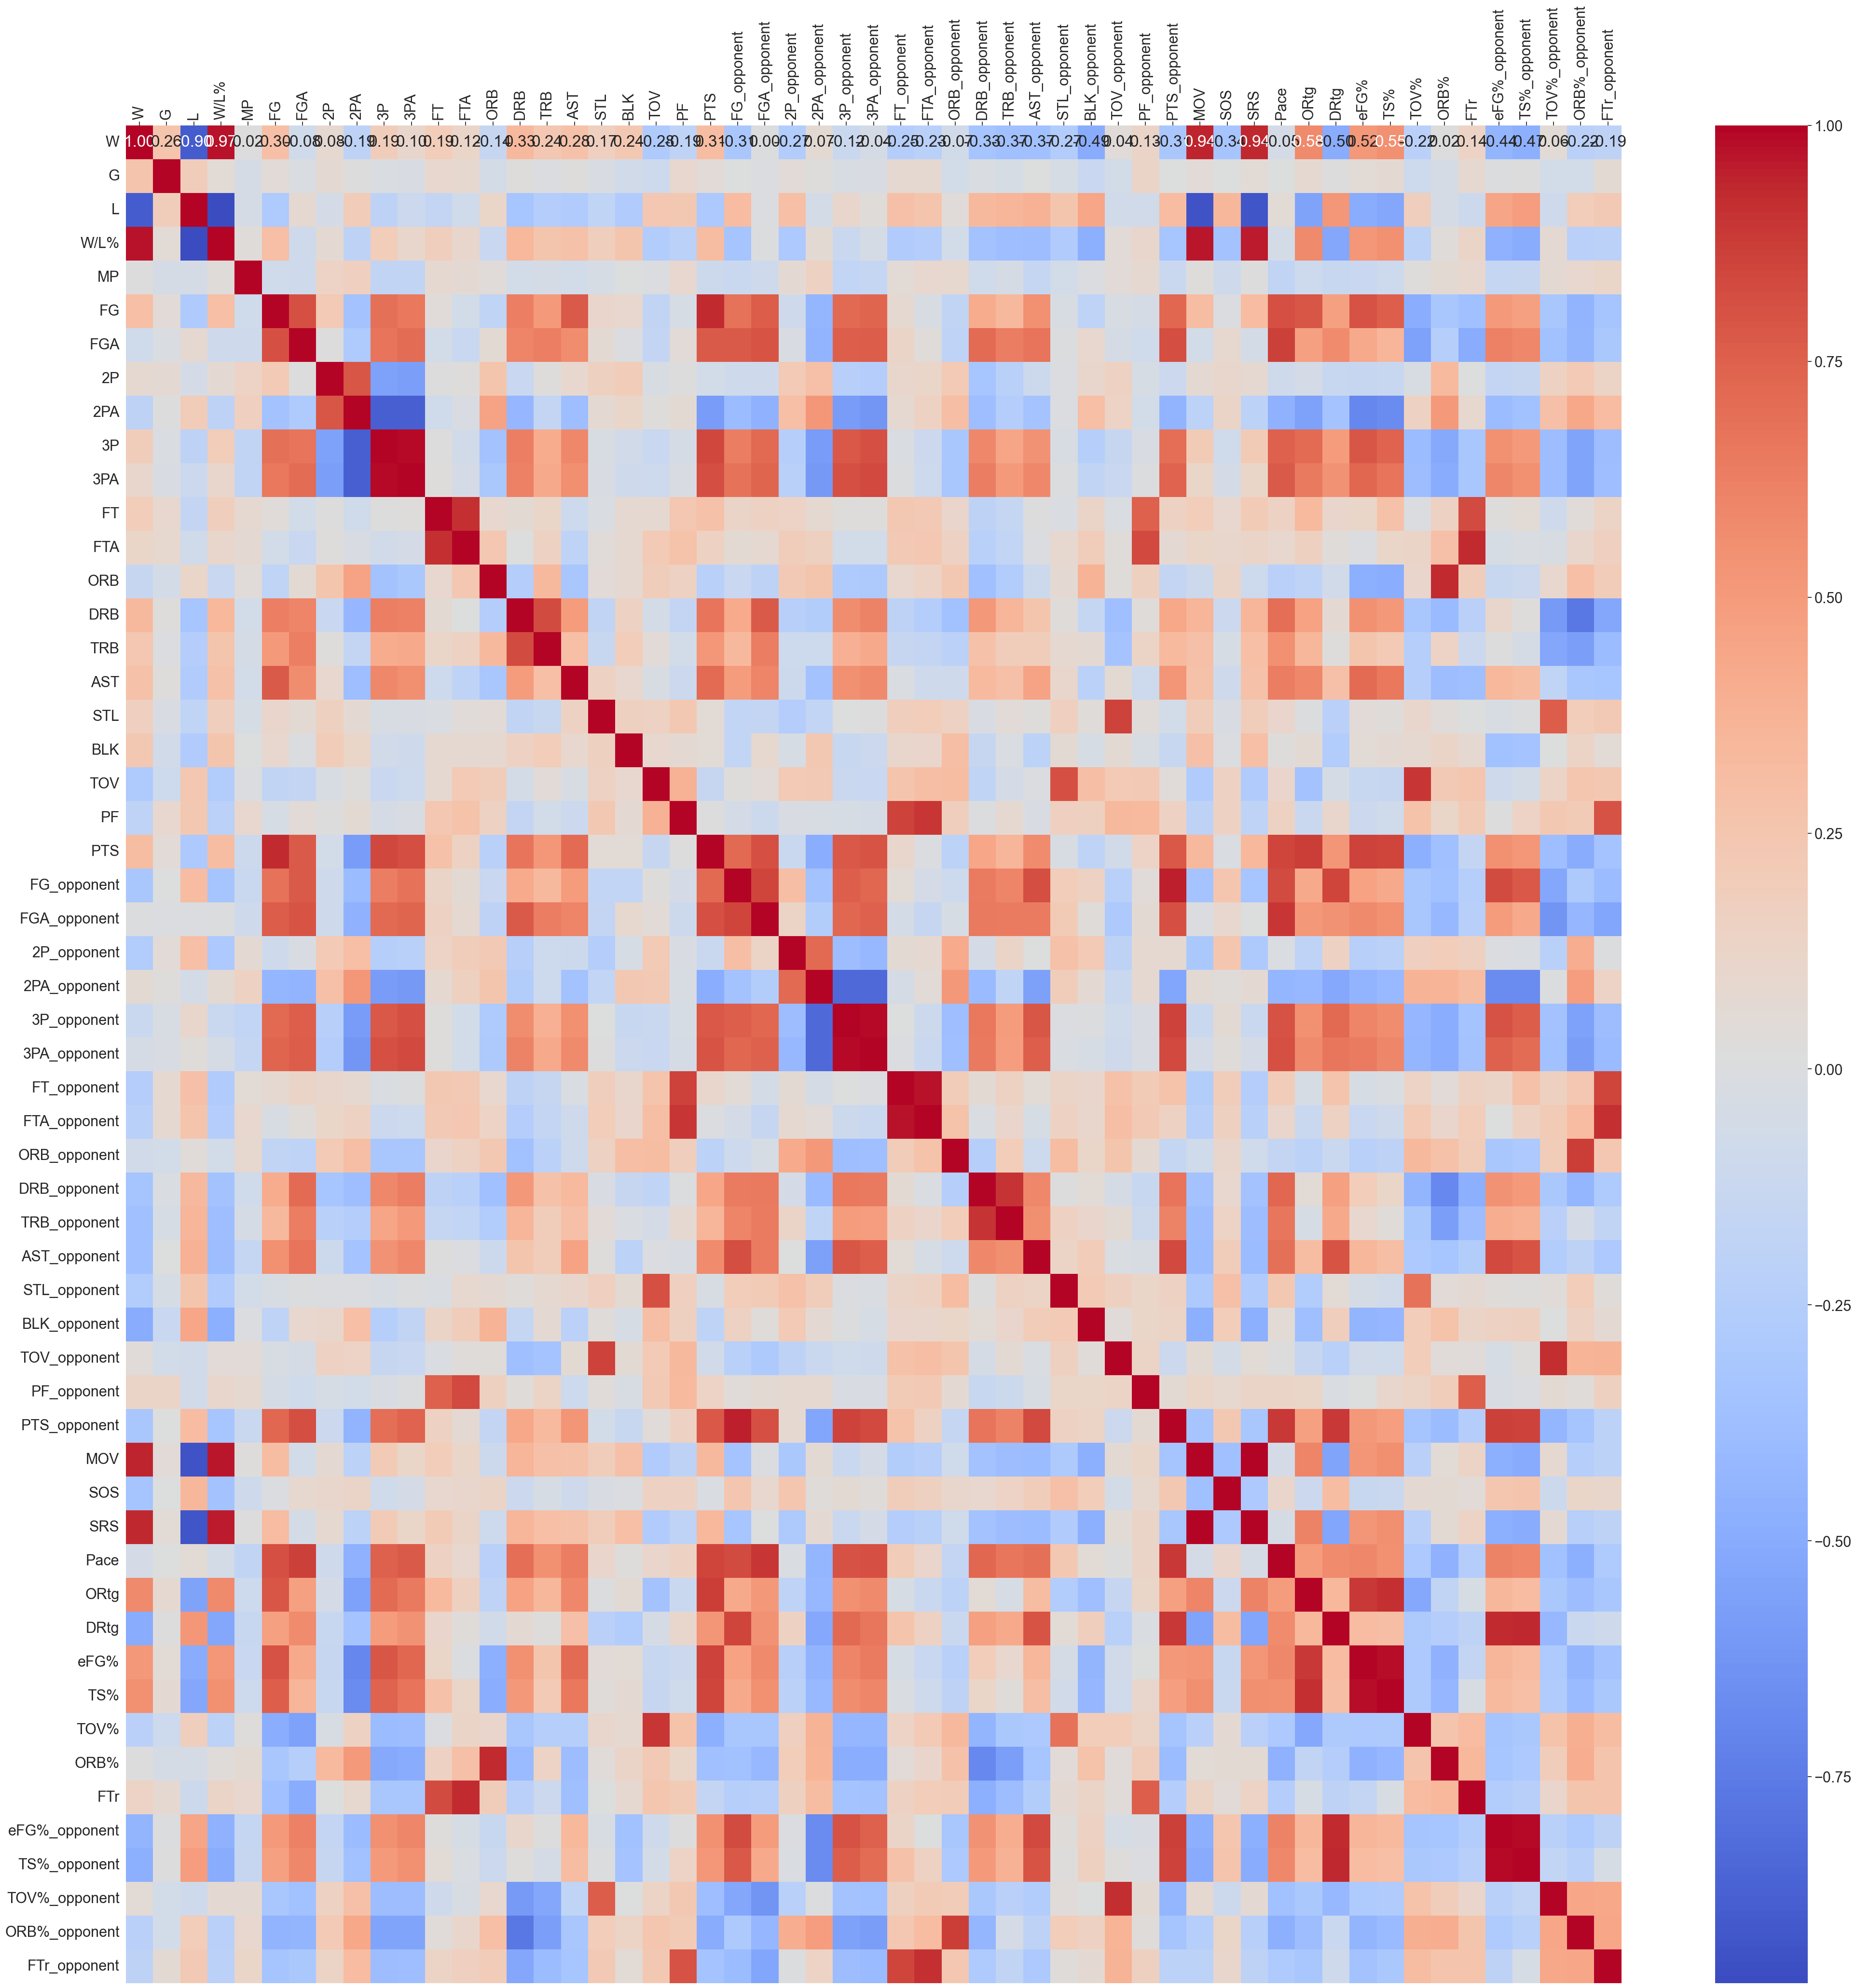

In [21]:
# Drop non-numeric or identifier columns
correlation_matrix_df = full_stats.drop(['Rk', 'Season', 'Team'], axis=1)

# Generate correlation matrix
correlation_matrix = correlation_matrix_df.corr()


# Display the correlation matrix
#print(correlation_matrix)

plt.figure(figsize=(50, 50))

# Plotting the heatmap with annotations
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
                 yticklabels=True, xticklabels=True)

# Positioning the variable names on top
ax.xaxis.tick_top()
plt.yticks(rotation=0)  # It sets the yticks horizontal
plt.xticks(rotation=90)  # It sets the xticks vertical

plt.savefig("correlation_matrix.png")
# Show the plot
plt.show()





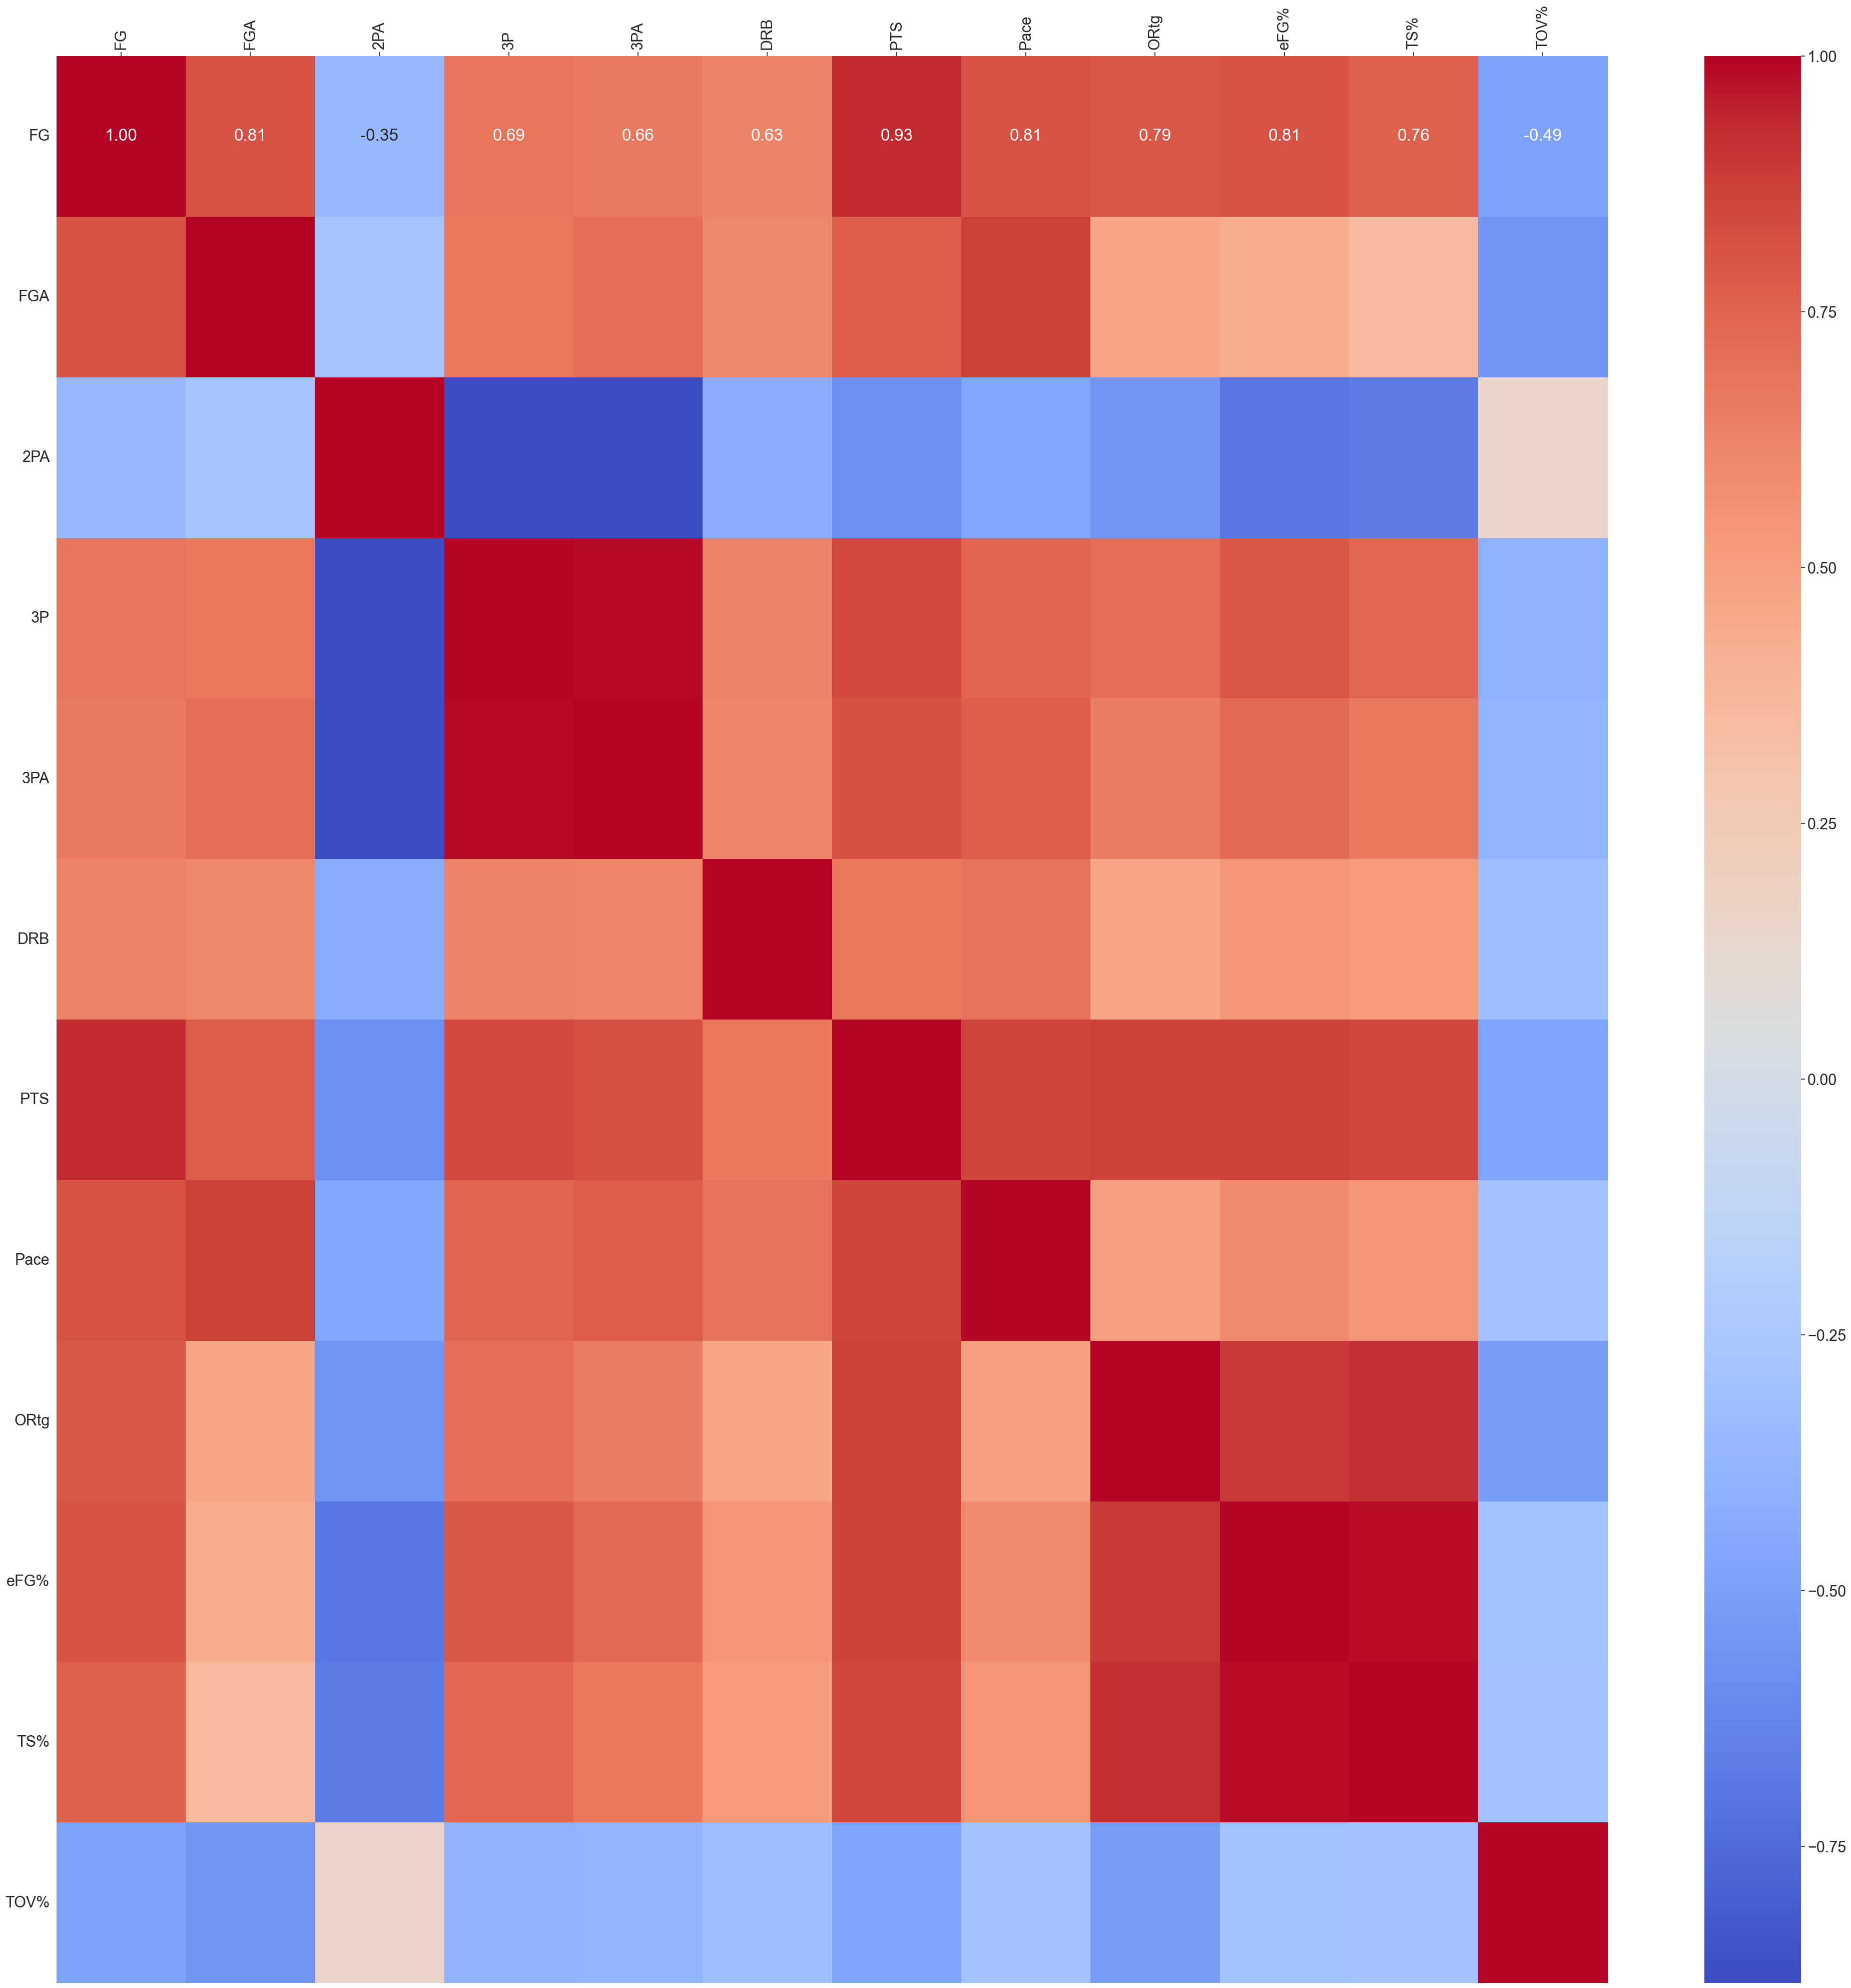

In [22]:
# build an offense correlation matrix
offense_correlation_df = full_stats.drop(['Rk', 'Season', 'STL_opponent', 'BLK_opponent', 'SOS', 'W', 'MOV', 'SRS','Team','G','L','W/L%','MP','ORB','TRB','AST','STL','BLK','TOV','PF','2P_opponent','2PA_opponent','FT_opponent', 'FG_opponent', 'FGA_opponent', '3P_opponent', '3PA_opponent', 'FTA_opponent', 'ORB_opponent', 'TRB_opponent', 'TOV_opponent', 'PF_opponent', "AST_opponent", "PTS_opponent",  'DRtg', 'ORB%', 'FTr', 'eFG%_opponent', '2P', 'FT', 'FTA', 'DRB_opponent', 'TS%_opponent', 'TOV%_opponent', 'ORB%_opponent',  'FTr_opponent'], axis=1)

# Generate correlation matrix
offense_correlation_matrix = offense_correlation_df.corr()

# Increase font scale for all text
sns.set(font_scale=2) 
# Display the correlation matrix
plt.figure(figsize=(50, 50))

# Plotting the heatmap with annotations
ax = sns.heatmap(offense_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
                 yticklabels=True, xticklabels=True)

# Positioning the variable names on top
ax.xaxis.tick_top()
plt.yticks(rotation=0)  # It sets the yticks horizontal
plt.xticks(rotation=90)  # It sets the xticks vertical

plt.savefig("offense_correlation.png")
# Show the plot
plt.show()



In [13]:
offense_correlation_df

,FG,FGA,2PA,3P,3PA,DRB,PTS,Pace,ORtg,eFG%,TS%,TOV%
0,42.5,87.3,55.7,13.1,31.6,36.2,114.9,99.3,114.5,0.563,0.593,13.5
1,43.1,87.1,55.8,12.0,31.2,35.0,115.9,99.8,115.6,0.563,0.597,13.2
2,40.1,82.9,64.4,7.0,18.5,34.5,103.5,93.8,110.3,0.526,0.564,12.4
3,41.6,87.0,60.0,10.8,27.0,34.3,110.0,98.3,111.6,0.540,0.571,13.1
4,38.4,77.4,55.4,8.7,22.1,30.4,102.9,90.7,112.3,0.552,0.588,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
377,36.4,83.2,68.3,5.0,14.9,29.3,97.8,94.4,102.9,0.468,0.517,13.7
378,38.6,88.2,56.9,10.4,31.3,32.9,106.3,100.3,105.2,0.497,0.540,13.2
379,36.0,82.2,63.2,6.7,18.9,29.3,95.5,91.8,103.0,0.479,0.519,14.1
380,36.2,84.0,56.5,9.3,27.5,31.8,97.4,97.9,98.8,0.487,0.519,14.8


In [14]:
defense_correlation_df = full_stats.drop(['Rk', 'MOV', '2P_opponent', 'W', 'STL_opponent', 'ORB%_opponent', 'SRS',	'BLK_opponent',	'TOV_opponent',	'PF_opponent',	'FT_opponent', 'TOV%', 'SOS', 'FTr_opponent', 'FTA_opponent', 'TRB_opponent', 'FTr', 'ORB_opponent', 'Season', 'L', 'W/L%', 'FG','FGA','2PA','3P','3PA','DRB','PTS','Pace','ORtg','eFG%','TS%','TOV', 'G',	'MP',	'2P',	'FT',	'FTA',	'ORB',	'TRB',	'AST',	'STL',	'BLK',	'PF'], axis=1)
defense_correlation_df




,Team,FG_opponent,FGA_opponent,2PA_opponent,3P_opponent,3PA_opponent,DRB_opponent,AST_opponent,PTS_opponent,DRtg,ORB%,eFG%_opponent,TS%_opponent,TOV%_opponent
0,GSW,38.9,89.4,65.9,7.8,23.5,32.5,22.2,104.1,103.8,23.5,0.479,0.520,12.6
1,GSW,38.8,89.2,61.4,9.0,27.8,31.8,22.7,104.3,104.0,22.8,0.486,0.525,13.5
2,SAS,35.7,81.8,61.9,6.6,19.9,31.4,20.8,92.9,99.0,23.0,0.477,0.513,14.1
3,GSW,37.0,86.4,65.0,7.2,21.4,32.8,21.0,99.9,101.4,24.1,0.470,0.514,14.3
4,MIA,35.6,80.9,59.1,7.6,21.7,28.9,20.2,95.0,103.7,22.2,0.487,0.527,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MIN,41.1,84.5,61.4,8.5,23.1,31.9,23.6,106.5,112.2,26.6,0.537,0.569,13.9
378,GSW,42.2,88.6,53.8,13.5,34.8,36.3,26.1,115.0,113.8,21.5,0.553,0.586,13.7
379,MIL,38.4,82.0,59.7,8.5,22.3,31.8,22.8,103.7,111.8,27.1,0.520,0.559,13.2
380,PHI,39.7,85.4,63.8,7.8,21.7,36.4,23.4,107.6,109.2,20.6,0.510,0.555,13.5


In [15]:
# Generate correlation matrix
defense_correlation_matrix = defense_correlation_df.corr()

# Increase font scale for all text
sns.set(font_scale=2) 

# Display the correlation matrix
plt.figure(figsize=(50, 50))

# Plotting the heatmap with annotations
ax = sns.heatmap(defense_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
                 yticklabels=True, xticklabels=True)

# Positioning the variable names on top
ax.xaxis.tick_top()
plt.yticks(rotation=0)  # It sets the yticks horizontal
plt.xticks(rotation=90)  # It sets the xticks vertical

# Show the plot
plt.show()


ValueError: could not convert string to float: 'GSW'